In [4]:

import matplotlib.pyplot as plt
from random import seed
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from algoritmo import jugar

In [5]:
seed(12345)
np.random.seed(12345)
sns.set_theme()

In [6]:
def generar_resultados(generador_de_monedas, maxima_cantidad_monedas):
    x = np.linspace(1, maxima_cantidad_monedas, 500).astype(int)
    return x, time_algorithm(jugar, x, lambda s: [generador_de_monedas(s)])

def ajustar_mediciones(x, resultados):
    f = lambda x, c1, c2: c1 * x ** 2 + c2
    c, _ = sp.optimize.curve_fit(f, x, [resultados[n] for n in x])
    r = np.sum((c[0] * x ** 2 + c[1] - [resultados[n] for n in x]) ** 2)
    return c[0], c[1], r

def graficar(generador_de_monedas, maxima_cantidad_monedas, titulo):
    x, resultados = generar_resultados(generador_de_monedas, maxima_cantidad_monedas)
    c1, c2, r = ajustar_mediciones(x, resultados)

    ax: plt.Axes
    _, ax = plt.subplots()
    ax.plot(x, [resultados[i] for i in x], label="Medición")
    ax.set_title(titulo)
    ax.set_xlabel('Tamaño del array')
    ax.set_ylabel('Tiempo de ejecución (s)')

    # Ajuste
    ax.plot(x, [c1 * n ** 2 + c2 for n in x], 'r--', label="Ajuste")
    ax.legend()

    print(f"La recta que mejor ajusta es: {c1} * x^2 + {c2}")
    print(f"El error cuadratico total es: {r}")

# Monedas Aleatorias

La recta que mejor ajusta es: 8.493576113746658e-07 * x^2 + -0.010361719073064804
El error cuadratico total es: 10.21448786481234


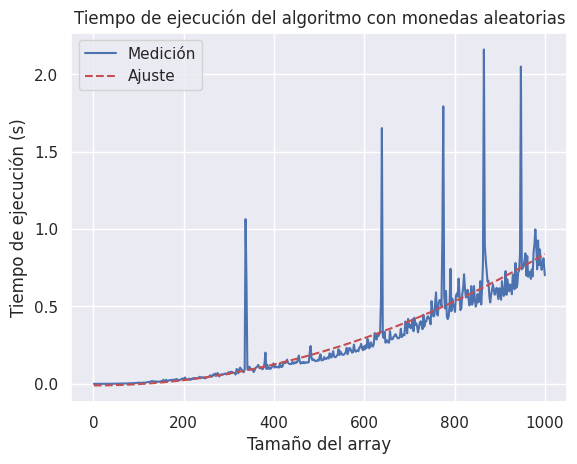

In [8]:
def generar_fila_de_monedas_aleatorias(size):
    return [np.random.randint(1, 1000) for _ in range(size)]

graficar(generar_fila_de_monedas_aleatorias, 1000, "Tiempo de ejecución del algoritmo con monedas aleatorias")

# Monedas Iguales

La recta que mejor ajusta es: 7.260586114780713e-07 * x^2 + 0.0021626787776820515
El error cuadratico total es: 8.417322023402491


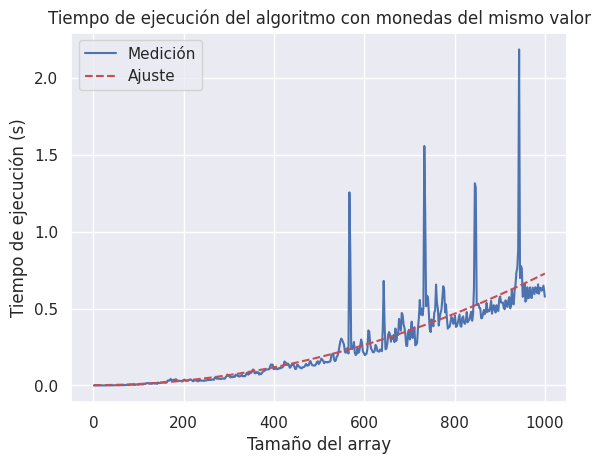

In [9]:
def generar_monedas_mismo_valor(size):
    return [1] * size

graficar(generar_monedas_mismo_valor, 1000, 'Tiempo de ejecución del algoritmo con monedas del mismo valor')

# Monedas Ordenadas Ascendentemente

La recta que mejor ajusta es: 7.501224404621707e-07 * x^2 + -0.01148576897153536
El error cuadratico total es: 8.559391480541747


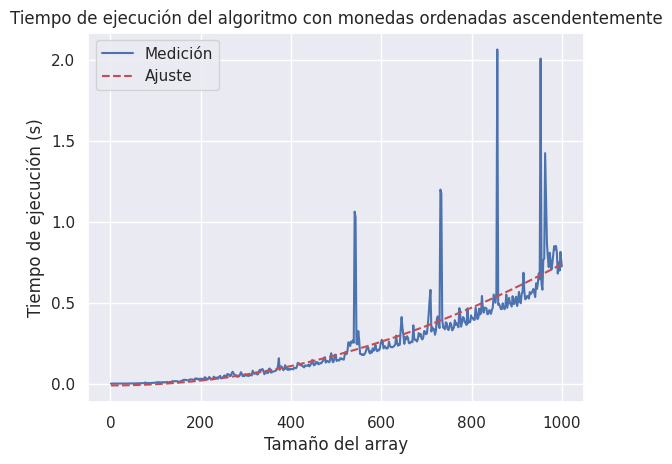

In [7]:
def generar_monedas_ascendente(size):
    return list(range(size))

graficar(generar_monedas_ascendente, 1000, 'Tiempo de ejecución del algoritmo con monedas ordenadas ascendentemente')